In [787]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, make_scorer 
from sklearn.model_selection import cross_val_score

In [788]:
train_set = pd.read_csv("train.csv").set_index("id")
test_set = pd.read_csv("test.csv").set_index("id")

## Data Mining

### Datasets Overview

In [789]:
train_set.head().T

id,0,1,2,3,4
Gender,Male,Female,Female,Female,Male
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,Sometimes,Frequently,Sometimes,Sometimes,Sometimes
SMOKE,no,no,no,no,no


In [790]:
test_set.head().T

id,20758,20759,20760,20761,20762
Gender,Male,Female,Female,Male,Female
Age,26.899886,21.0,26.0,20.979254,26.0
Height,1.848294,1.6,1.643355,1.553127,1.627396
Weight,120.644178,66.0,111.600553,103.669116,104.835346
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.938616,2.0,3.0,2.0,3.0
NCP,3.0,1.0,3.0,2.977909,3.0
CAEC,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes
SMOKE,no,no,no,no,no


In [791]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             20758

In [792]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13840 entries, 20758 to 34597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             1

### Data Type

In [793]:
train_set.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [794]:
train_set.describe(include=['object', 'bool'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


### Summary

| Features      | Description | Variable | Type |
|--------------|----------|----------|----------|
| id       | Identifier        | Numerical | int |
| Gender      | Gender        | Categorical | object |
| Age      | Age        | Numerical | float |
| Height     | Height     | Numerical | float |
| Weight      | Weight     | Numerical | float |
| family_history_with_overweight   | family member suffered or suffers from overweight        | Categorical | object |
| FAVC      | Frequent consumption of high caloric food     | Categorical | object |
| FCVC      | Frequency of consumption of vegetables     | Numerical | float |
| NCP      | Number of main meals     | Numerical | float |
| CAEC      | Consumption of food between meals     | Categorical | object |
| SMOKE      | Smoker or not     | Categorical | object |
| CH2O      | Consumption of water daily     | Numerical | float|
| SCC      | Calories consumption monitoring     | Categorical | object |
| FAF      | Physical activity frequency     | Numerical | float |
| TUE      | Time using technology devices     | Numerical | float |
| CALC      | Consumption of alcohol     | Categorical | object |
| MTRANS      | Transportation used     | Categorical | object |
| NObeyesdad      | Obesity level deducted     | Categorical | object |

### Missing Values

In [795]:
print('There are {} missing values in the train set'.format(train_set.isnull().sum().sum()))
print('There are {} missing values in the test set'.format(test_set.isnull().sum().sum()))

There are 0 missing values in the train set
There are 0 missing values in the test set


### Duplicated Rows

In [796]:
print('There are {} duplicate rows in the train set'.format((train_set.duplicated() == True).sum()))
print('There are {} duplicate rows in the test set'.format((test_set.duplicated() == True).sum()))

There are 0 duplicate rows in the train set
There are 0 duplicate rows in the test set


### Distribution of the Numerical Features

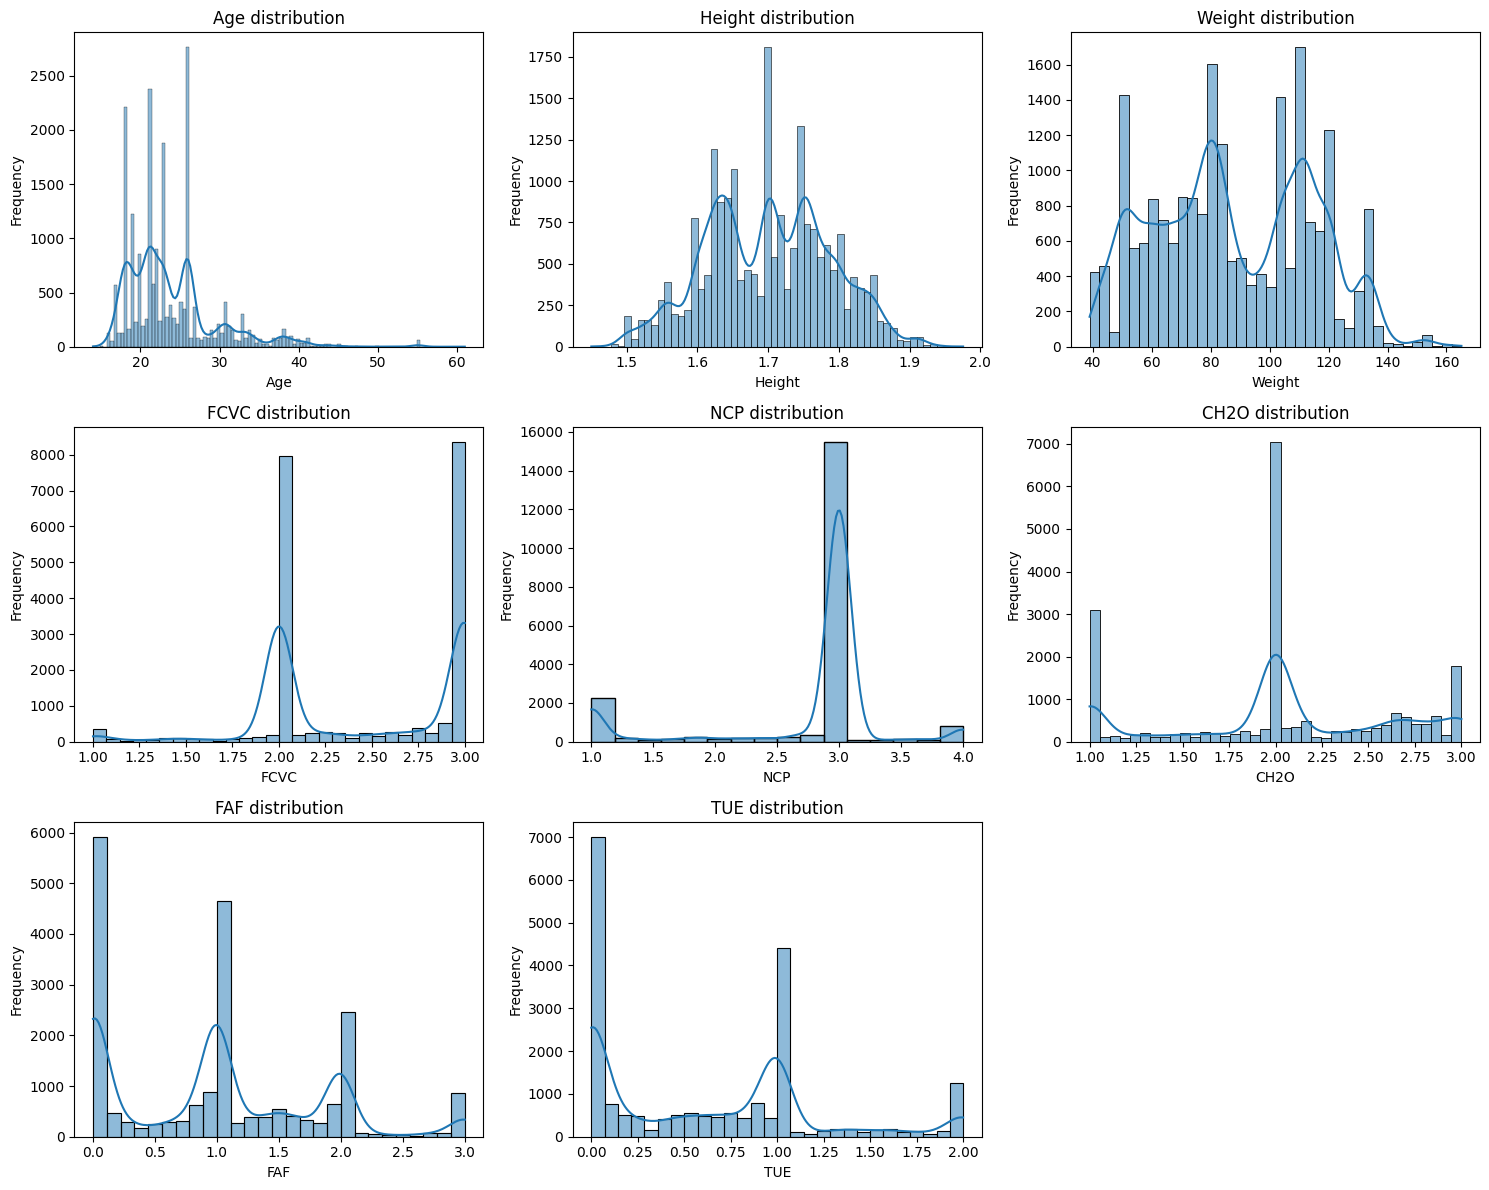

In [797]:
num_cols = train_set.select_dtypes(include=['int', 'float']).columns
num_plots = len(num_cols)
n_cols = 3
n_rows = num_plots // n_cols + (num_plots % n_cols > 0) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows)) 

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(train_set[col], ax=axes[i], kde=True)
    axes[i].set_title(f'{col} distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Distribution of the Categorical Features

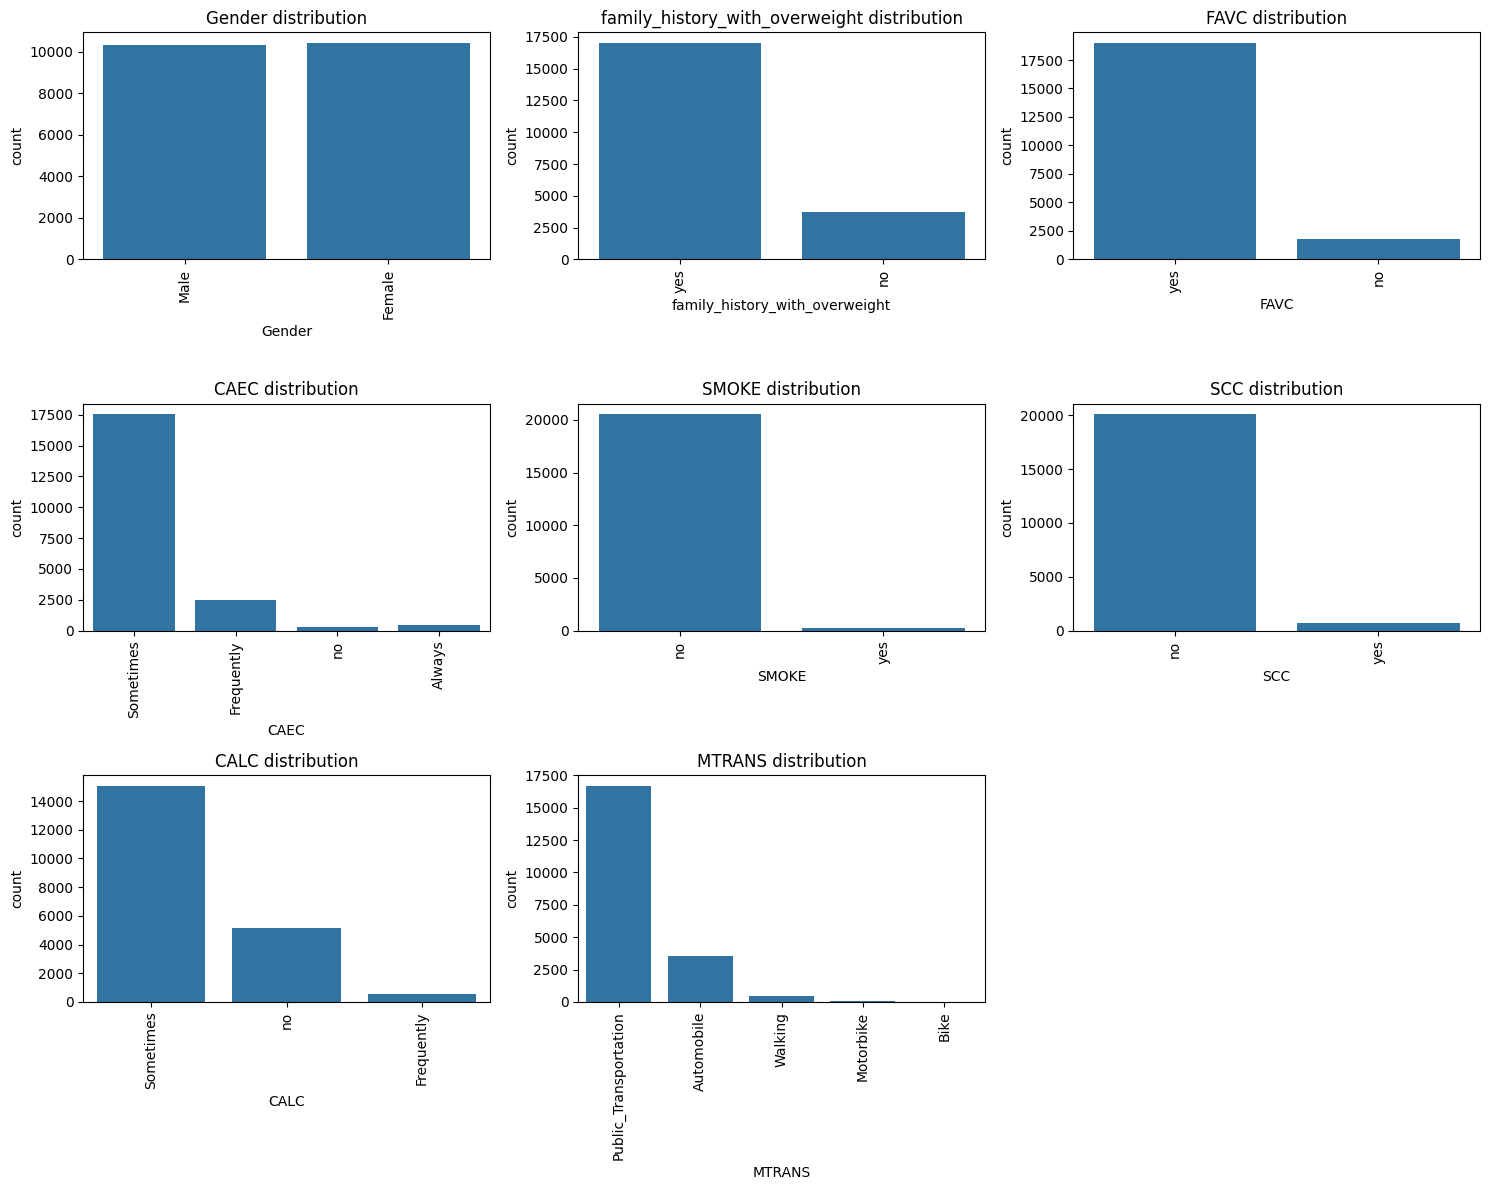

In [798]:
cat_cols = train_set.select_dtypes(include=['object', 'bool']).drop('NObeyesdad', axis=1).columns
num_plots = len(cat_cols)
n_cols = 3 
n_rows = num_plots // n_cols + (num_plots % n_cols > 0)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=train_set[col], ax=axes[i])
    axes[i].set_title(f'{col} distribution')
    axes[i].tick_params(axis='x', rotation=90) 

for j in range(i+1, n_rows * n_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

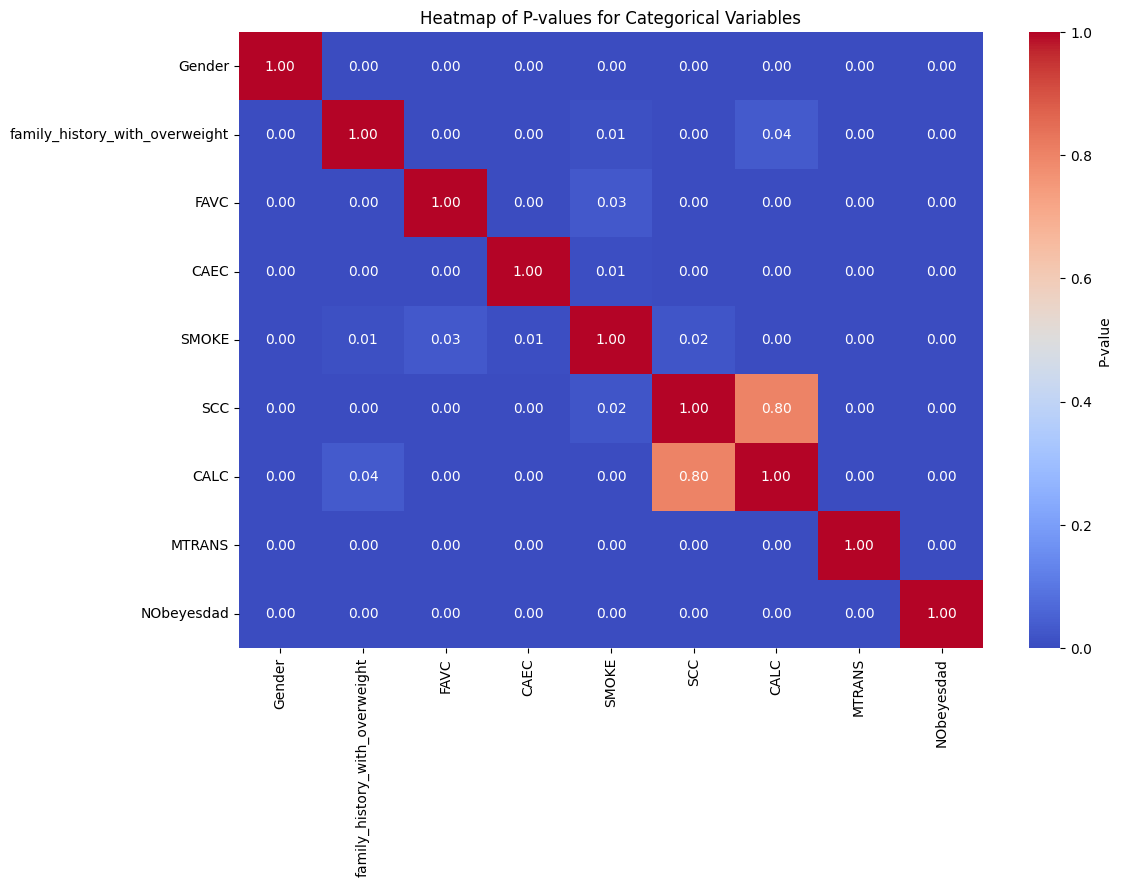

In [799]:
from scipy.stats import chi2_contingency

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Charger les données
train_set = pd.read_csv('train.csv')

# Sélectionner uniquement les variables catégorielles
cat_cols = train_set.select_dtypes(include=['object']).columns

# Initialiser une matrice vide pour stocker les p-valeurs
p_values = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Calculer le test de chi-carré pour chaque paire de variables catégorielles
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(train_set[col1], train_set[col2])
            _, p, _, _ = chi2_contingency(contingency_table)
            p_values.loc[col1, col2] = p
        else:
            p_values.loc[col1, col2] = 1  # La diagonale (comparaison de la variable avec elle-même)

# Convertir les p-valeurs en type numérique
p_values = p_values.astype(float)

# Visualisation de la matrice des p-valeurs
plt.figure(figsize=(12, 8))
sns.heatmap(p_values, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'P-value'})
plt.title('Heatmap of P-values for Categorical Variables')
plt.show()


### Target Analysis

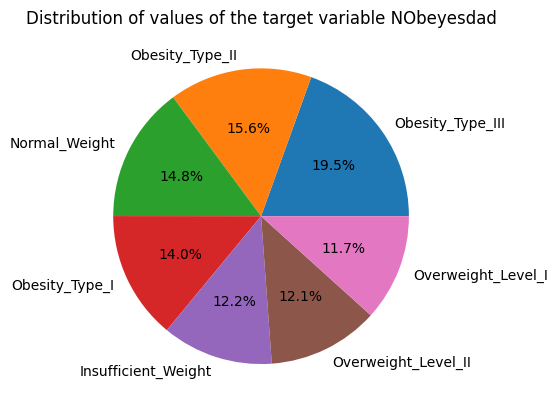

In [800]:
counts = train_set['NObeyesdad'].value_counts()

fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')

ax.set_title('Distribution of values ​​of the target variable NObeyesdad')

plt.show()

## Data Preprocessing

### Categorical Features

In [801]:
# Fetching categorical features
categorical_cols = train_set.select_dtypes(include=['object', 'bool']).columns
target = train_set['NObeyesdad']
categorical_data = train_set[categorical_cols].drop('NObeyesdad', axis=1)
pd.DataFrame(categorical_data).head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1,Female,yes,yes,Frequently,no,no,no,Automobile
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation


In [802]:
# categorical_data['Gender_CALC'] = categorical_data['Gender'] + '_' + categorical_data['CALC']
# categorical_data['Gender_CAEC'] = categorical_data['Gender'] + '_' + categorical_data['CAEC']
# categorical_data['SCC_CALC'] = categorical_data['SCC'] + '_' + categorical_data['CALC']
categorical_data['MTRANS_family_history_with_overweight'] = categorical_data['MTRANS'] + '_' + categorical_data['family_history_with_overweight']
# categorical_data['MTRANS_SCC'] = categorical_data['MTRANS'] + '_' + categorical_data['SCC']
pd.DataFrame(categorical_data).head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,MTRANS_family_history_with_overweight
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Public_Transportation_yes
1,Female,yes,yes,Frequently,no,no,no,Automobile,Automobile_yes
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Public_Transportation_yes
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Public_Transportation_yes
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Public_Transportation_yes


#### Categorical Features Encoding

In [803]:
# Ordinal encoding
encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']])
if isinstance(categorical_data['CALC'].iloc[0], str):
    categorical_data['CALC'] = encoder.fit_transform(categorical_data[['CALC']])
if isinstance(categorical_data['CAEC'].iloc[0], str):
    categorical_data['CAEC'] = encoder.fit_transform(categorical_data[['CAEC']])

# One hot encoding
# categorical_data = categorical_data.drop(columns=['SCC'])
# cols_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS', 'Gender_CALC', 'Gender_CAEC']
cols_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS', 'MTRANS_family_history_with_overweight'] # MTRANS_family_history_with_overweight
if set(cols_to_encode).issubset(categorical_data.columns):
    categorical_data = pd.get_dummies(categorical_data, columns=cols_to_encode)
pd.DataFrame(categorical_data).head()

,CAEC,CALC,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,...,MTRANS_family_history_with_overweight_Automobile_no,MTRANS_family_history_with_overweight_Automobile_yes,MTRANS_family_history_with_overweight_Bike_no,MTRANS_family_history_with_overweight_Bike_yes,MTRANS_family_history_with_overweight_Motorbike_no,MTRANS_family_history_with_overweight_Motorbike_yes,MTRANS_family_history_with_overweight_Public_Transportation_no,MTRANS_family_history_with_overweight_Public_Transportation_yes,MTRANS_family_history_with_overweight_Walking_no,MTRANS_family_history_with_overweight_Walking_yes
0,1.0,1.0,False,True,False,True,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
1,2.0,0.0,True,False,False,True,False,True,True,False,...,False,True,False,False,False,False,False,False,False,False
2,1.0,0.0,True,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1.0,True,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
4,1.0,1.0,False,True,False,True,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False


#### Categorical Features Selection

In [804]:
from sklearn.feature_selection import SelectFromModel

# Supposons que X est l'ensemble des features et y la variable cible
clf = RandomForestClassifier()
clf.fit(categorical_data, target)

# Sélectionner les features basées sur l'importance calculée par le modèle
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(categorical_data)

# Identifier les features sélectionnées
selected_features = categorical_data.columns[(model.get_support())]

# Afficher les features les plus importantes
print(selected_features)

Index(['CAEC', 'CALC', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes',
       'MTRANS_family_history_with_overweight_Public_Transportation_yes'],
      dtype='object')


c:\Users\Aubin Bonnefoy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [805]:
features = categorical_data[selected_features.to_list()]
features

,CAEC,CALC,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,MTRANS_family_history_with_overweight_Public_Transportation_yes
0,1.0,1.0,False,True,False,True,True
1,2.0,0.0,True,False,False,True,False
2,1.0,0.0,True,False,False,True,True
3,1.0,1.0,True,False,False,True,True
4,1.0,1.0,False,True,False,True,True
...,...,...,...,...,...,...,...
20753,1.0,1.0,False,True,False,True,True
20754,2.0,1.0,False,True,True,False,False
20755,1.0,0.0,False,True,False,True,True
20756,1.0,0.0,False,True,False,True,False


#### Target Encoding

In [806]:
labelEncoder = LabelEncoder()
target = labelEncoder.fit_transform(target)
pd.DataFrame(target).head()

,0
0,6
1,1
2,0
3,4
4,6


### Numerical Features

In [807]:
numerical_cols = train_set.select_dtypes(include=['int64', 'float64']).columns
numerical_data = train_set[numerical_cols]

# numerical_data['Age_Height'] = numerical_data['Age'] * numerical_data['Height']
# numerical_data['Age_Weight'] = numerical_data['Age'] * numerical_data['Weight']
# numerical_data['Weight_FAF'] = numerical_data['Weight'] * numerical_data['FAF']
# numerical_data = numerical_data.drop(['FAF'], axis=1)


pd.DataFrame(numerical_data).head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721


In [808]:
# Concatenating categorical features with numerical features
dataset = pd.concat([numerical_data, categorical_data], axis=1)
pd.DataFrame(dataset).head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CAEC,...,MTRANS_family_history_with_overweight_Automobile_no,MTRANS_family_history_with_overweight_Automobile_yes,MTRANS_family_history_with_overweight_Bike_no,MTRANS_family_history_with_overweight_Bike_yes,MTRANS_family_history_with_overweight_Motorbike_no,MTRANS_family_history_with_overweight_Motorbike_yes,MTRANS_family_history_with_overweight_Public_Transportation_no,MTRANS_family_history_with_overweight_Public_Transportation_yes,MTRANS_family_history_with_overweight_Walking_no,MTRANS_family_history_with_overweight_Walking_yes
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1.0,...,False,False,False,False,False,False,False,True,False,False
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.0,...,False,True,False,False,False,False,False,False,False,False
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1.0,...,False,False,False,False,False,False,False,True,False,False
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1.0,...,False,False,False,False,False,False,False,True,False,False
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1.0,...,False,False,False,False,False,False,False,True,False,False


In [809]:
from sklearn.ensemble import RandomForestClassifier

dataset = dataset.drop(['id'], axis = 1)

# RandomForest pour l'importance des features
model = LGBMClassifier(verbose=0)
model.fit(dataset, target)

# Créer un DataFrame pour afficher les noms des features et leurs importances
feature_importances = pd.DataFrame({
    'Feature': dataset.columns,
    'Importance': model.feature_importances_
})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
pd.DataFrame(feature_importances)


,Feature,Importance
2,Weight,4259
1,Height,3520
0,Age,3039
5,CH2O,1637
6,FAF,1625
7,TUE,1408
3,FCVC,1203
4,NCP,1133
9,CALC,584
8,CAEC,545


### Cross Validation

In [810]:
def cross_validation(model, X_train, y_train, n_folds=12):
    scoring = make_scorer(accuracy_score)
    scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring=scoring)
    mean_accuracy = np.mean(scores)
    print("Cross-validation accuracy: ", mean_accuracy)

In [811]:
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)
cross_validation(LGBMClassifier(verbose=0), dataset, target)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Cross-validation accuracy:  0.9047116457216852


In [816]:
print("Cross-validation accuracy:  0.9055184453676866")

Cross-validation accuracy:  0.9055184453676866


## Dimensionality Reduction

### Principal Component Analysis

After One Hot Encoding, 22 components are necessary to maintain 100% variance (19 components for 95%)

In [812]:
# scaler = StandardScaler()
# scaler.fit(dataset)
# scaled_dataset = scaler.transform(dataset)

# pca = PCA(n_components=16)
# pca_out = pca.fit(scaled_dataset)
# pca_data = pca.transform(scaled_dataset)

# pc_list = ["PC"+str(i) for i in list(range(1, pca_out.n_components+1))]
# pc_load = ["loading "+str(i) for i in list(range(1, pca_out.n_components+1))]
# cum_explained_var =np.cumsum(pca_out.explained_variance_ratio_)
# df_pca=pd.DataFrame({'Variance Ratio':pca_out.explained_variance_ratio_
#                      ,'Cumulated Variance Ratio':cum_explained_var
#                     }, index=pc_list)
# df_pca.T

### Truncated SVD

In [813]:
# from sklearn.decomposition import TruncatedSVD

# scaler = StandardScaler()
# scaler.fit(dataset)
# scaled_dataset = scaler.transform(dataset)

# svd = TruncatedSVD(n_components=22, random_state=42) 

# svd_data = svd.fit_transform(scaled_dataset)

# svd_list = ["SVD"+str(i) for i in range(1, svd.n_components+1)]

# explained_variance_ratio = svd.explained_variance_ratio_
# cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# df_svd = pd.DataFrame({
#     'Variance Ratio': explained_variance_ratio,
#     'Cumulated Variance Ratio': cumulative_explained_variance
# }, index=svd_list)

# df_svd.T


## Evaluating

In [814]:
# List of models to try
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Machine', SVC()),
    ('Light Gradient Boosting', LGBMClassifier(verbose=0)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

model_scores = {}

X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)

for name, model in models:
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                               ('model', model)])
    
    pipeline.fit(X_train, y_train)
    
    score = pipeline.score(X_test, y_test)
    
    model_scores[name] = score

model_scores = sorted(model_scores.items(), key=lambda t: t[1], reverse=True)

for name, value in model_scores:
    print('{} Accuracy : {}'.format(name, value))

pd.DataFrame(model_scores)

Light Gradient Boosting Accuracy : 0.9060693641618497
Gradient Boosting Accuracy : 0.9060693641618497
Random Forest Accuracy : 0.8822254335260116
Logistic Regression Accuracy : 0.8627167630057804
Decision Tree Accuracy : 0.8453757225433526
Support Vector Machine Accuracy : 0.8412813102119461


,0,1
0,Light Gradient Boosting,0.906069
1,Gradient Boosting,0.906069
2,Random Forest,0.882225
3,Logistic Regression,0.862717
4,Decision Tree,0.845376
5,Support Vector Machine,0.841281


### Confusion Matrix

The best model is the Light Gradient Boosting


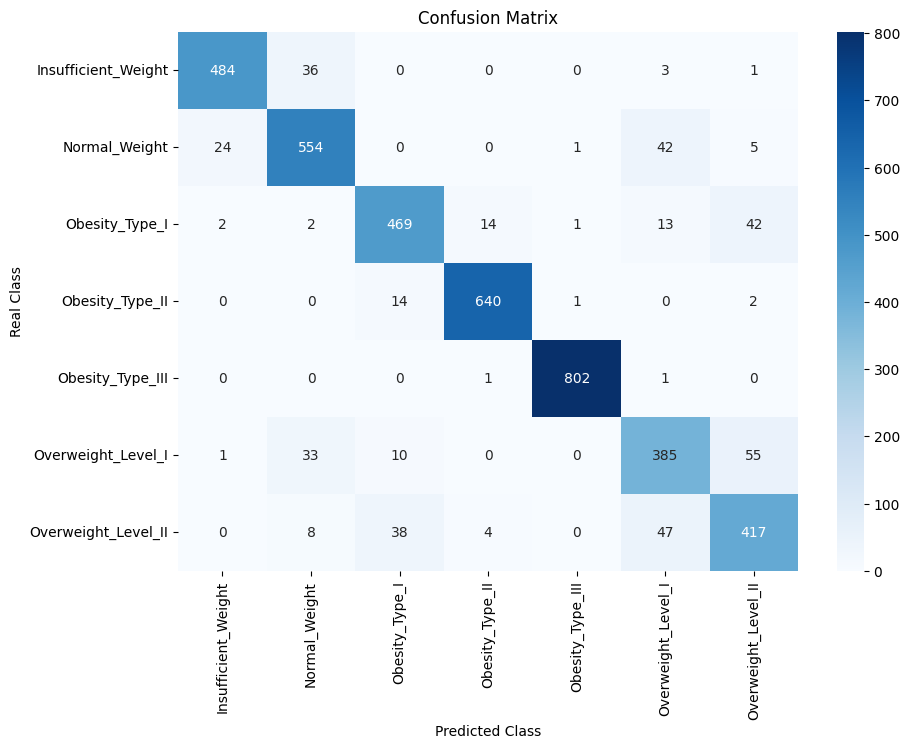

In [815]:
for name, model in models:
    if model_scores[0][0] == name:
        print('The best model is the {}'.format(name))
        best_model = model

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

label = np.unique(labelEncoder.inverse_transform(target).tolist())

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.ylabel('Real Class')
plt.xlabel('Predicted Class')
plt.show()
target = labelEncoder.inverse_transform(target)

### GridSearchCV